## PART 1 PROBLEMS
#The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the 
#other cities in Rest of India while those in New Delhi, Ghaziabad, 
#Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

7947 705


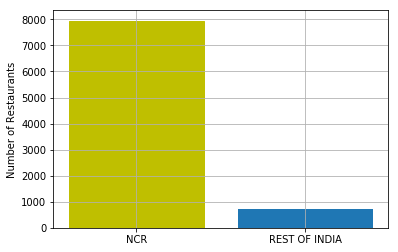

In [7]:
#QUESTION 1
# Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_data = pd.read_csv('zomato.csv',encoding ="latin-1")
csv_data  = csv_data[csv_data["Country Code"]== 1]
df = csv_data.copy()
total = df.shape[0]
NCR_df = df[(df.City =='New Delhi')| (df.City =='Gurgaon')|(df.City =='Noida')|(df.City == 'Ghaziabad')|(df.City=='Faridabad')]
ncr = NCR_df.shape[0]
rest  = total - ncr
print(ncr,rest)
bar = plt.bar(["NCR","REST OF INDIA"],[ncr,rest])
plt.ylabel('Number of Restaurants')
bar[0].set_color('y')
plt.grid()
plt.show()

In [8]:
# QUESTION 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_data = pd.read_csv('zomato.csv',encoding ="latin-1")
csv_data  = csv_data[csv_data["Country Code"]== 1]
df = csv_data.copy()
def regina(d) :
    if d =='New Delhi'or d =='Gurgaon'or d =='Noida'or d == 'Ghaziabad'or d=='Faridabad' :
        return 'NCR'
    else :
        return 'ROI'
df['Region'] = df.City.apply(regina)
df_ncr = df[df.Region == 'NCR']
df_rest = df[df.Region == 'ROI']
nc = set()
rc = set()
for i in df_ncr.Cuisines :
    for j in i.strip().split(',') :
        nc.add(j.strip())
for i in df_rest.Cuisines :
    for j in i.strip().split(',') :
        rc.add(j.strip())
no_cus = []
for i in rc: 
    if i  not in nc :
        no_cus.append(i)
print(no_cus)

['Malwani', 'Cajun', 'German', 'BBQ']


In [11]:
#Checking using Zomato API whether this cuisines are actually not served in restaurants 
import requests
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers={'user-key':'f3f7015d6d6567621c5086766efa3825'},
                   params={'city_id':1})
py_data = res.json()
for i in py_data['cuisines']:
    ncr_cuis_from_api = i['cuisine']['cuisine_name'].strip()
    if ncr_cuis_from_api in no_cus:
        print(ncr_cuis_from_api,'is servered in NCR')
        
print("-------------------------------------")
print('There is lack of data in CSV file as there are some Cuisines which are served by Delhi-NCR restaurant which according to data in CSV files are not')

BBQ is servered in NCR
Malwani is servered in NCR
-------------------------------------
There is lack of data in CSV file as there are some Cuisines which are served by Delhi-NCR restaurant which according to data in CSV files are not


In [5]:
# QUESTION 3
# Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_data = pd.read_csv('zomato.csv',encoding ="latin-1")
csv_data  = csv_data[csv_data["Country Code"]== 1]
df = csv_data.copy()
def regina(d) :
    if d =='New Delhi'or d =='Gurgaon'or d =='Noida'or d == 'Ghaziabad'or d=='Faridabad' :
        return 'NCR'
    else :
        return 'ROI'
df['Region'] = df.City.apply(regina)
df_ncr = df[df.Region == 'NCR']
df_rest = df[df.Region == 'ROI']
nc = []
rc = []
for i in df_ncr.Cuisines :
    for j in i.strip().split(',') :
        nc.append(j.strip())
for i in df_rest.Cuisines :
    for j in i.strip().split(',') :
        rc.append(j.strip())
dfcus_ncr = pd.DataFrame(nc)
dfcus_rest = pd.DataFrame(rc)
topcuisines_ncr  = dfcus_ncr[0].value_counts()[:10]
topcuisines_rest = dfcus_rest[0].value_counts()[:10]
print(topcuisines_ncr)
print(topcuisines_rest)

North Indian    3597
Chinese         2448
Fast Food       1866
Mughlai          933
Bakery           697
South Indian     569
Continental      547
Desserts         542
Street Food      538
Italian          535
Name: 0, dtype: int64
North Indian    349
Chinese         242
Continental     177
Italian         147
Cafe            136
Fast Food        97
South Indian     62
Mughlai          59
Desserts         55
Mexican          50
Name: 0, dtype: int64


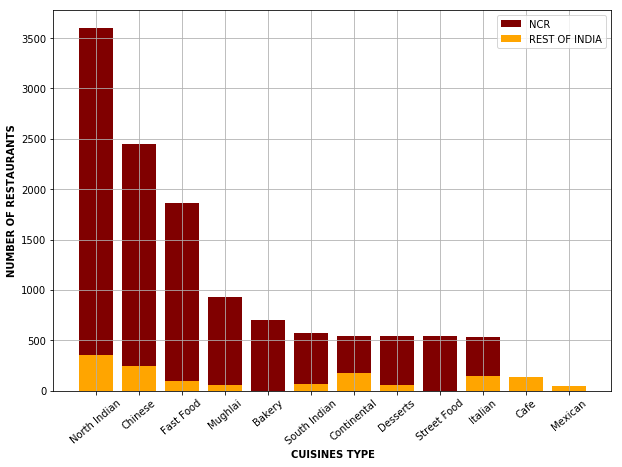

In [6]:
#QUESTION 4
#Write a short detailed analysis of how cuisine served 
#is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.
import matplotlib.pyplot as plt
cuisines_NCR = topcuisines_ncr.index
count_NCR = topcuisines_ncr.values
cuisines_ROI = topcuisines_rest.index
count_ROI = topcuisines_rest.values
plt.figure(figsize =(10, 7)) 
plt.bar(cuisines_NCR,count_NCR,color ='maroon',label ='NCR')
plt.bar(cuisines_ROI,count_ROI,color ='orange',label ='REST OF INDIA')
plt.xlabel('CUISINES TYPE', fontweight ='bold') 
plt.ylabel('NUMBER OF RESTAURANTS', fontweight ='bold') 
plt.grid()
plt.legend()
plt.xticks(rotation = 40)
plt.show()